# 이항분류

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.classification import *
from helper.tensor import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel(path="https://data.hossam.kr/mldata/dogs.xlsx", categories=['dog'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dog     200 non-null    category
 1   length  200 non-null    float64 
 2   height  200 non-null    float64 
dtypes: category(1), float64(2)
memory usage: 3.6 KB
None

데이터프레임 상위 5개 행
+----+-------+----------+----------+
|    | dog   |   length |   height |
|----+-------+----------+----------|
|  0 | d     |    55.01 |    29.27 |
|  1 | d     |    59.01 |    29.39 |
|  2 | d     |    56.53 |     28.5 |
|  3 | d     |    53.66 |     28.5 |
|  4 | d     |    49.67 |    31.97 |
+----+-------+----------+----------+

데이터프레임 하위 5개 행
+-----+-------+----------+----------+
|     | dog   |   length |   height |
|-----+-------+----------+----------|
| 195 | j     |    50.95 |    52.37 |
| 196 | j     |    51.86 |     52.4 |
| 197 | j     |    54.24 |    47.82 |
| 198 | j     |    53.13 |    50.22 |
| 199 | j     |  

## #02. 데이터 전처리

### [1] 종속변수 라벨링

분류를 수행할 경우 종속변수가 라벨링이 되어 있어야 하며, 데이터 타입이 정수 형태로 설정되어야 한다.

In [3]:
df = my_labelling(origin, 'dog')
df

,dog,length,height
0,0,55.01,29.27
1,0,59.01,29.39
2,0,56.53,28.50
3,0,53.66,28.50
4,0,49.67,31.97
...,...,...,...
195,1,50.95,52.37
196,1,51.86,52.40
197,1,54.24,47.82
198,1,53.13,50.22


### [2] 훈련, 검증 데이터 분리

In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(data=df, yname='dog')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

## #03. 훈련 모델 적합

### [1] 모델 구성

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 분류 | 이항분류 | [relu,] sigmoid | rmsporp | binary_crossentropy | acc | 타이타닉 생존률 예측 |

In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1], )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

### [2] 모델 학습

In [6]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), verbose=0, callbacks = [
    EarlyStopping(monitor = 'val_acc', patience=10, verbose = 1),
    ReduceLROnPlateau(monitor= "val_acc", patience=5, min_lr=0.0001, verbose=1)
])


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 11: early stopping


### [3] 학습 곡선 확인

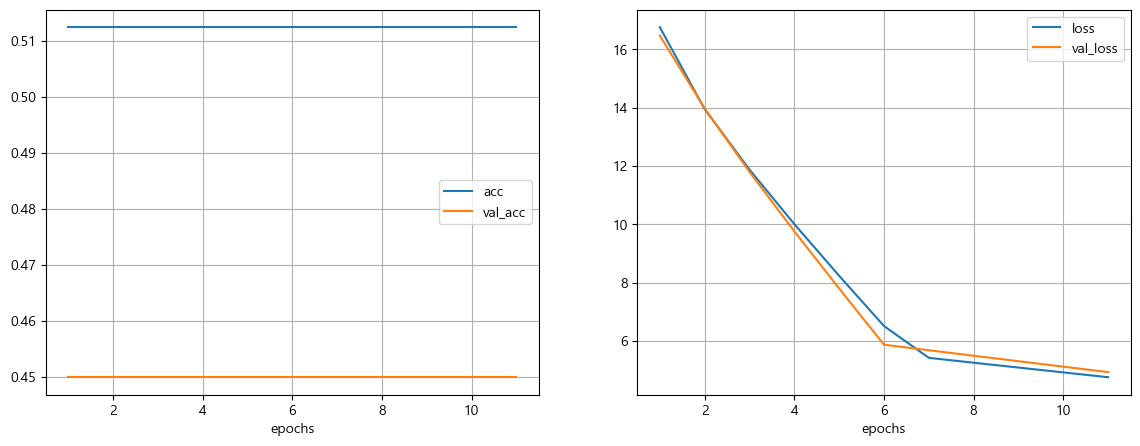

+----------+--------+---------+-----------+------------+-----------------+
|   epochs |    acc |    loss |   val_acc |   val_loss |   learning_rate |
|----------+--------+---------+-----------+------------+-----------------|
|        1 | 0.5125 | 16.7587 |      0.45 |    16.4723 |           0.001 |
|        2 | 0.5125 | 13.9492 |      0.45 |    13.9775 |           0.001 |
|        3 | 0.5125 | 11.8787 |      0.45 |    11.7996 |           0.001 |
|        4 | 0.5125 | 10.0099 |      0.45 |    9.76335 |           0.001 |
|        5 | 0.5125 | 8.23676 |      0.45 |    7.80024 |           0.001 |
|        6 | 0.5125 |  6.5162 |      0.45 |     5.8763 |           0.001 |
|        7 | 0.5125 | 5.42592 |      0.45 |    5.68643 |          0.0001 |
|        8 | 0.5125 | 5.25869 |      0.45 |    5.49818 |          0.0001 |
|        9 | 0.5125 | 5.09257 |      0.45 |    5.31077 |          0.0001 |
|       10 | 0.5125 | 4.92706 |      0.45 |    5.12389 |          0.0001 |
|       11 | 0.5125 | 4.7

In [7]:
tf_result(result, history_table=True)

## #04. 성능평가

### [1] 검증 데이터에 대한 예측 결과 산정

sklearn의 경우 `predict()`의 결과가 1차 배열로 리턴되지만 tensor는 2차 배열로 리턴된다.

sklearn의 성능평가 함수를 활용하기 위해서는 `predict()`의 결과를 1차 배열로 변환해야 한다.

In [8]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
40개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[2.70259420e-07]
 [5.63286478e-04]
 [3.06659145e-04]
 [3.57348569e-07]
 [1.64864741e-05]
 [6.09042880e-04]
 [9.39610274e-08]
 [1.23074926e-06]
 [8.00166866e-09]
 [1.40059987e-04]
 [1.43642993e-07]
 [1.81099796e-03]
 [2.54885713e-03]
 [1.78712758e-03]
 [3.89799766e-07]
 [7.99888085e-08]
 [1.41854279e-08]
 [6.55162221e-05]
 [1.47204304e-07]
 [2.28485277e-07]
 [1.06777734e-04]
 [1.04462364e-04]
 [4.07756232e-07]
 [1.28035055e-04]
 [3.17173203e-07]
 [5.26361930e-07]
 [1.61611879e-05]
 [3.38093960e-05]
 [1.53854617e-03]
 [6.30807691e-08]
 [1.01585294e-06]
 [3.02969845e-08]
 [7.47031154e-05]
 [4.33492794e-04]
 [6.63456774e-08]
 [3.24031891e-04]
 [6.85899460e-04]
 [8.87547458e-07]
 [9.57877728e-06]
 [2.31275208e-05]]


### [2] 예측결과를 1차 배열로 변환

> 이 내용을 모듈에 적용함

In [9]:
pred = test_pred.flatten()
pred

array([2.70259420e-07, 5.63286478e-04, 3.06659145e-04, 3.57348569e-07,
       1.64864741e-05, 6.09042880e-04, 9.39610274e-08, 1.23074926e-06,
       8.00166866e-09, 1.40059987e-04, 1.43642993e-07, 1.81099796e-03,
       2.54885713e-03, 1.78712758e-03, 3.89799766e-07, 7.99888085e-08,
       1.41854279e-08, 6.55162221e-05, 1.47204304e-07, 2.28485277e-07,
       1.06777734e-04, 1.04462364e-04, 4.07756232e-07, 1.28035055e-04,
       3.17173203e-07, 5.26361930e-07, 1.61611879e-05, 3.38093960e-05,
       1.53854617e-03, 6.30807691e-08, 1.01585294e-06, 3.02969845e-08,
       7.47031154e-05, 4.33492794e-04, 6.63456774e-08, 3.24031891e-04,
       6.85899460e-04, 8.87547458e-07, 9.57877728e-06, 2.31275208e-05],
      dtype=float32)

### [3] 분류 결과 확인

In [10]:
# my_classification_result(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)